# Allegheny County Park Features Analysis
---
## Getting the data
First, the data is imported, read, and previewed. Unnecessary data will be stripped and any NaN values will be disregarded later on.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("park_features.csv")
df = df[["center", "feature_name", "capacity"]]

df.sample(10)

,center,feature_name,capacity
32,Harrison Hills Park,Laurel,100.0
482,North Park,Platform Tennis Courts,NaN
561,North Park,Allegheny County Police Academy,NaN
329,White Oak Park,Off-Leash Dog Park,NaN
41,North Park,Old Fire House,60.0
236,South Park,Lebanon,40.0
326,Boyce Park,Skate Park,NaN
537,South Park,Playground,NaN
524,South Park,Stage,NaN
555,Settler's Cabin Park,Basketball Courts,NaN


Now, we have a dataframe of name 'df' that contains only the park name, feature name, and feature capacity. This stripped down the data from the original imported csv file to only what is necessary in analyzing the capacities for each park.

---
## Analyzing the data
Next, an empty string will be made to be filled with all unique parks.

In [7]:
all_parks = []
all_parks = df.center.unique()

Next, an empty dictionary will be made. This dictionary will contain each park name as a key with their value storing the total capacity of the park. The total capacity of any park is determined by adding up the individual capacities of each park feature that is listed in the dataframe.

In [3]:
park_capacities = {}

# There must be a better way to do this
for park in all_parks:
    for row in range(len(df)):
        capacity = df.iloc[row,2]
        if df.iloc[row,0] == park and capacity == float(capacity):
            if park in park_capacities:
                park_capacities[park] += capacity
            else:
                park_capacities[park] = capacity

---
## Looking at the results
The dictionary can be printed out and the park with the highest capacity can be identified.

In [4]:
sorted_capacities = sorted(park_capacities.items(), key=lambda x:x[1])
park_capacities = dict(sorted_capacities)
for key in park_capacities:
    print("{0:30} {1}".format(key, park_capacities[key]))

Round Hill Park                580.0
Deer Lakes Park                585.0
White Oak Park                 1111.0
Harrison Hills Park            1130.0
Settler's Cabin Park           1140.0
Boyce Park                     1515.0
South Park                     4757.0
North Park                     6577.0
Hartwood Acres Park            10500.0


It's kind of hard to visualize the data in this format, so it will be plotted to get a better idea for how each park compares in capacity.

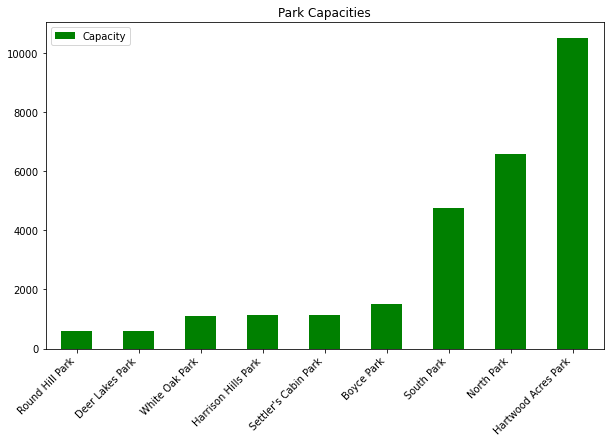

In [5]:
capacity = pd.DataFrame.from_dict(park_capacities, orient='index', columns=['Capacity']).sort_values(by='Capacity')

capacity.plot(kind='bar', figsize =(10,6), color='g')
plt.title('Park Capacities')
plt.xticks(rotation=45, ha='right')
plt.show()

Looking at this bar graph, it is clear that Hartwood Acres Park has the highest capacity. Next, a way to score each park by their capacity is needed in order to utilize this as a sub-metric. This is done by giving a percentage for the park's capacity out of the park with the highest capacity, so Hartwood Acres Park would get a score of 100, being the best park in the submetric of capacity.

In [6]:
scores = {}
for park in park_capacities:
    scores[park] = round(((park_capacities[park]*100)/10500.0), 1)

print("Park Scores\n")
for i in scores:
    print("{0:30} {1}".format(i, scores[i]))

Park Scores

Round Hill Park                5.5
Deer Lakes Park                5.6
White Oak Park                 10.6
Harrison Hills Park            10.8
Settler's Cabin Park           10.9
Boyce Park                     14.4
South Park                     45.3
North Park                     62.6
Hartwood Acres Park            100.0


---
## Conclusion

Out of all the parks, Hartwood Acres Park has the highest capacity by far. A possible error with this approach is that the dataset could be biased to one park by the other parks' features being not as fully assessed, or by other parks having missing/undocumented features. This submetric will still be used, as it assesses the parks' affordance to outdoor activities. Each park is now scored with points for this, and the points for each park will be used in the final judging of the best neigborhood in Pittsburgh. This will be done by adding all the points of every park within a **24 minute** drive of each neighborhood and seeing which neighborhood has the most points in the end.